## Extended Figure 6

This manuscript generates extended data figure 6 and relavent data of the paper. 

Kexin Dong

Date created: May 24, 2024  

Last updated: Oct 20, 2025

In [1]:
import matplotlib as mpl
import scipy.stats
mpl.rcParams['pdf.fonttype'] = 42   
mpl.rcParams['ps.fonttype'] = 42 
mpl.rcParams['text.usetex'] = False 
import bioh2m as h2m
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import matplotlib.colors as mcolors
from adjustText import adjust_text
import matplotlib.patheffects as PathEffects
from sksurv.nonparametric import kaplan_meier_estimator
from statannotations.Annotator import Annotator
from matplotlib.ticker import FixedLocator, FuncFormatter
import seaborn as sns
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

/Users/kexindong/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/kexindong/Library/Python/3.9/lib/python/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


# Extended Figure 6b

The percentages of mutations of genes in the H2M Database that can be modeled in their human paralogous gene(s), stratified by modeling strategy.

In [2]:
df_result = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/paralog/h2h_result.csv')

In [3]:
df_result.drop_duplicates(subset='index')['class'].value_counts()

class
0    7324
4    6014
1    2254
2     633
Name: count, dtype: int64

In [4]:
input = len(df_result.drop_duplicates(subset='index'))


In [5]:
input

16225

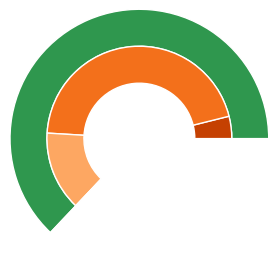

In [ ]:
fig, ax = plt.subplots(figsize=(3,3), nrows = 1, ncols = 1)
output, n_0,n_1,n_2,n_3 = 7324+2254+633, 7324, 2254, 633, 0
ax.axis('equal')
mypie2, _ = ax.pie([output+n_3, input-output-n_3], radius=1.4, colors=[plt.cm.Greens(0.7),'white'], startangle=0)
plt.setp(mypie2, width=0.4, edgecolor='white')

mypie3, _ = ax.pie([n_2,n_0,n_1,n_3,input-(n_0+n_1+n_2+n_3)], radius=1, colors=[plt.cm.Oranges(0.8), plt.cm.Oranges(0.6),plt.cm.Oranges(0.4),'grey','white'], startangle=0)
plt.setp(mypie3, width=0.4, edgecolor='white')
ax.margins(0,0)

plt.savefig(f'figures/ext_6b.pdf', bbox_inches='tight')
plt.show()

# Extended Figure 6c

Scatter plot of AlphaMissense scores of mapped SMARCA4 and SMARCA2 mutations, colored by H2M modeling.

In [15]:
df_h2m = pd.read_csv('/Users/kexindong/Documents/GitHub/Output/paralog/smarca.csv')

10 [0.4415357  0.94712136]
11 [0.75918633 0.4231895 ]
12 [-0.50386402  0.51567351]
13 [-0.97509234  0.24447599]
7 [ 0.06865289 -0.70403236]
8 [-0.40641155 -0.3989223 ]
3 [-0.22266165  0.79499479]
4 [ 0.97920821 -0.85668298]
5 [-0.27437366  0.90328875]


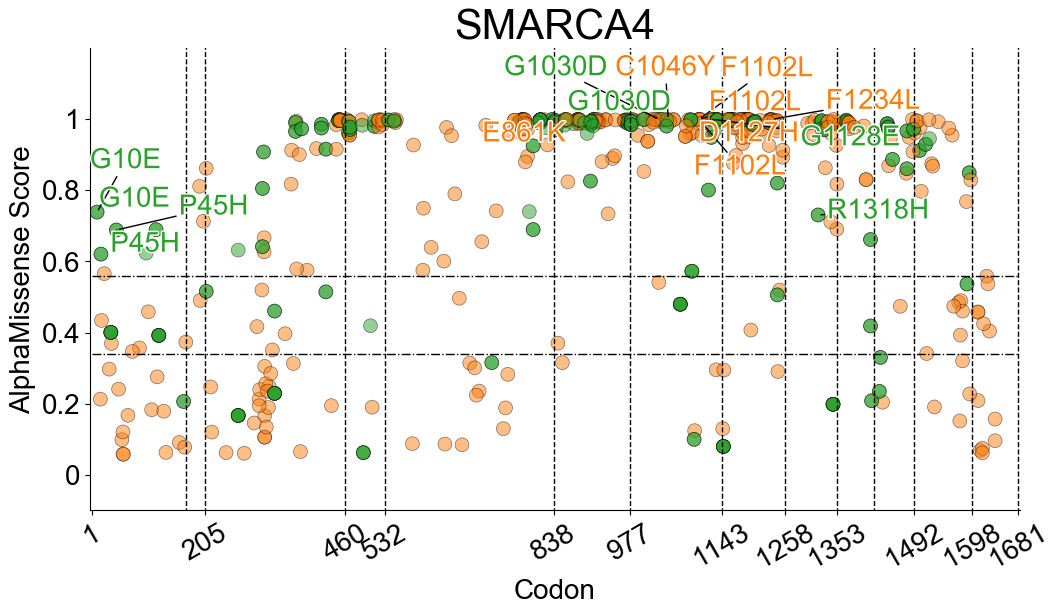

In [19]:
### SMARCA4
fs = 0
df_merged = df_h2m[df_h2m['flank_size'] >= 0].reset_index(drop=True).sort_values(by = 'HGVSp_h_1').reset_index(drop=True)

gene = 'SMARCA4'

bbb1 = df_merged[(df_merged['am_pathogenicity_1'] >= .9997) & (df_merged['status'] == True)].iloc[:10,:]
bbb2 = df_merged[(df_merged['am_pathogenicity_1'] <= .045) & (df_merged['status'] == False)]
bbb3 = df_merged[(df_merged['class'] == 1) & (df_merged['am_pathogenicity_1'] <= .8) & (df_merged['am_pathogenicity_1'] >= .6)].iloc[:5,:]
# top_2 = df_merged['HGVSp_h'].value_counts().index.to_list()[:2]
# bbb3 = df_merged[df_merged['HGVSp_h'].isin(top_2)]
bb2 = pd.concat((bbb1, bbb2,bbb3))

t = list(bb2['HGVSp_h_1'])
x = list(bb2['loc_h_1'])
y = list(bb2['am_pathogenicity_1'])
c = list(bb2['color_h2m_1'])

c = list(bb2['color_class'])
fig, ax = plt.subplots(figsize=(12, 6))
# 绘制散点图
g = ax.scatter(data=df_merged, x='loc_h_1', y='am_pathogenicity_1',  c = 'color_class', alpha=.5, s=100, edgecolor='black', linewidths=.5)

# 绘制参考线
ax.plot([0, 1681], [0.56, 0.56], linewidth=1, linestyle='-.', color='black')
ax.plot([0, 1681], [0.34, 0.34], linewidth=1, linestyle='-.', color='black')
# ax.set_ylim(-6, 6)
ax.set_xlim(-3, 1684)
ax.set_ylim(-.1, 1.2)
ax.set_ylabel(f"AlphaMissense Score", fontsize=20)
ax.set_xlabel("Codon", fontsize=20)
ax.set_title(f"{gene}", fontsize=30)
boundaries = [171,205,460,532,838,977,1143,1258,1353,1420,1492,1598,1681]
boundaries_ = [1,205,460,532,838,977,1143,1258,1353,1492,1598,1681]
ax.xaxis.set_ticks(boundaries_)
ax.xaxis.set_ticklabels(boundaries_, size=20, fontweight=100, rotation = 30)
for bound in boundaries:
    ax.plot([bound, bound], [-6, 6], linewidth=1, linestyle='dashed', color='black')

texts = [ax.text(x[i], y[i], t[i], fontsize=20, color=c[i], path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")]) for i in range(len(x))]
ax.yaxis.set_ticks([0,.2,.4,.6,.8,1])
ax.yaxis.set_ticklabels([0,0.2,0.4,0.6,0.8,1], size=20, fontweight=100)
adjust_text(texts,only_move={'texts':'xy'}, ax=ax, arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', which='major', labelsize=20)
plt.savefig(f'figures/ext_6c_smarca4.pdf', bbox_inches='tight')
plt.show()

10 [0.00703044 0.9629368 ]
11 [0.2693734  0.59588865]
12 [-0.74620089 -0.3642834 ]
13 [-0.04692842  0.46039144]
7 [ 0.74988222 -0.99417756]
8 [-0.74070929  0.16458476]
3 [-0.54334662  0.3786223 ]
4 [-0.30244771 -0.79495196]
5 [-0.46025153 -0.23338372]


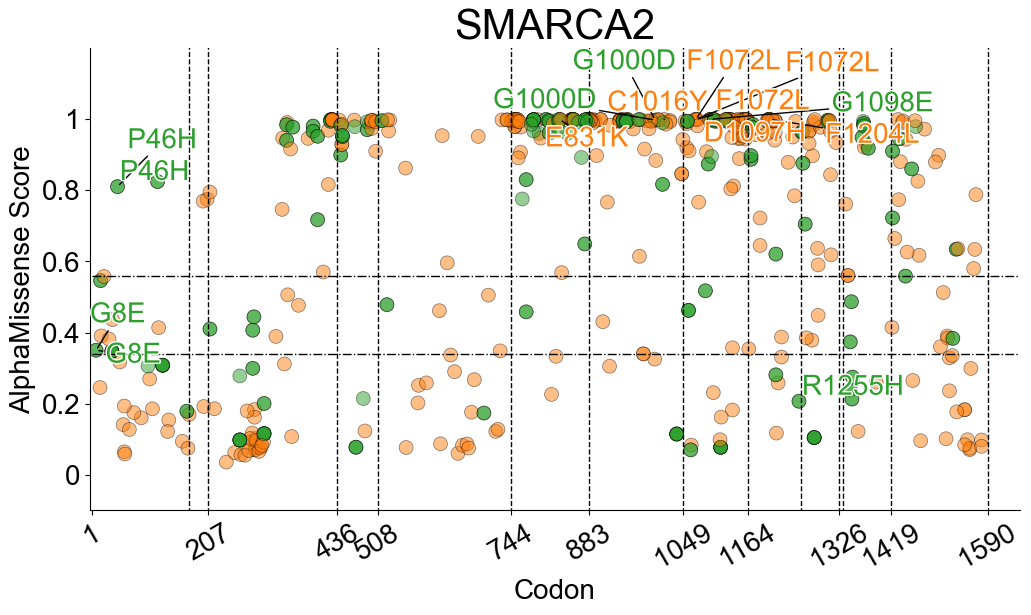

In [18]:
### SMARCA4
fs = 0
df_merged = df_h2m[df_h2m['flank_size'] >= 0].reset_index(drop=True).sort_values(by = 'HGVSp_h_1').reset_index(drop=True)
gene = 'SMARCA2'

# bbb1 = df_merged[(df_merged['am_pathogenicity_2'] >= .9997) & (df_merged['status'] == True)].iloc[:10,:]
# bbb2 = df_merged[(df_merged['am_pathogenicity_2'] <= .045) & (df_merged['status'] == False)]
# bbb3 = df_merged[(df_merged['class'] == 1) & (df_merged['am_pathogenicity_2'] <= .8) & (df_merged['am_pathogenicity_2'] >= .6)].iloc[:5,:]
# # top_2 = df_merged['HGVSp_h'].value_counts().index.to_list()[:2]
# # bbb3 = df_merged[df_merged['HGVSp_h'].isin(top_2)]
# bb2 = pd.concat((bbb1, bbb2,bbb3))

t = list(bb2['HGVSp_h_2'])
x = list(bb2['loc_h_2'])
y = list(bb2['am_pathogenicity_2'])
c = list(bb2['color_class'])

fig, ax = plt.subplots(figsize=(12, 6))

g = ax.scatter(data=df_merged, x='loc_h_2', y='am_pathogenicity_2',  c = 'color_class', alpha=.5, s=100, edgecolor='black', linewidths=.5)


ax.plot([0, 1681], [0.56, 0.56], linewidth=1, linestyle='-.', color='black')
ax.plot([0, 1681], [0.34, 0.34], linewidth=1, linestyle='-.', color='black')
# ax.set_ylim(-6, 6)
ax.set_xlim(-3, 1647)
ax.set_ylim(-.1, 1.2)
ax.set_ylabel(f"AlphaMissense Score", fontsize=20)
ax.set_xlabel("Codon", fontsize=20)
ax.set_title(f"{gene}", fontsize=30)
boundaries = [173,207,436,508,744,883,1049,1164,1259,1326,1333,1419,1590]
boundaries_ = [1,207,436,508,744,883,1049,1164,1326,1419,1590]
ax.xaxis.set_ticks(boundaries_)
ax.xaxis.set_ticklabels(boundaries_, size=20, fontweight=100, rotation = 30)
for bound in boundaries:
    ax.plot([bound, bound], [-6, 6], linewidth=1, linestyle='dashed', color='black')

texts = [ax.text(x[i], y[i], t[i], fontsize=20, color=c[i], path_effects=[PathEffects.withStroke(linewidth=2, foreground="w")]) for i in range(len(x))]
ax.yaxis.set_ticks([0,.2,.4,.6,.8,1])
ax.yaxis.set_ticklabels([0,0.2,0.4,0.6,0.8,1], size=20, fontweight=100)
adjust_text(texts,only_move={'texts':'xy'}, ax=ax, arrowprops=dict(arrowstyle="-", linewidth=1, alpha=1, color='black'))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', which='major', labelsize=20)
plt.savefig(f'figures/ext_6c_smarca2.pdf', bbox_inches='tight')
plt.show()